![Big Data](https://pbs.twimg.com/media/FhgxQQXWYAAFovW?format=jpg&name=medium)

<b> Problem statement:</b> We are sure you have heard about "Fake news" plenty of times recently. This is a topic which has
gained an exponential fame with the enormous growth of the Internet and specially, social networks
over the last few years.
This outburst of the social media flooded the internet with information, making it a competitor
to traditional media. However, contrary to this latter, no accreditation nor proofreading process is
required to post on social media. This means that everyone can post anything wanted, what makes
it is very easy to post fake news. At the end, it results in the spread of misinformation. <br>

The purpose of our project is to treat posts written on different social media in order to check
whether a statement on the actuality is false or not. This will imply to be able to stream data from
social media sources, train a machine learning based model involving natural language processing
methods to classify the different posts as "reliable" or "unreliable" 

![Big Data Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import the Fake News Data and Analyze </font>

![Big Data](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [125]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
from matplotlib import pyplot as plt

#### <font color = blue> Build a Connection

In [44]:
sc = SparkContext(master = "local[2]")
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [55]:
spark = SparkSession.builder.appName("FakeNewsDetection").getOrCreate()

#### <font color = blue>Load the Dataset

In [161]:
fake = spark.read.csv('Fake.csv', header = True, inferSchema = True)
true = spark.read.csv('True.csv', header = True, inferSchema = True)

#### <font color = blue>Label the Dataset

In [162]:
fake = fake.withColumn("label", lit(1))
true = true.withColumn("label", lit(0))

#### <font color = blue>Merge the Dataset

In [163]:
df = fake.unionByName(true)
df.show(5)

+--------------------+--------------------+-------+-----------------+-----+
|               title|                text|subject|             date|label|
+--------------------+--------------------+-------+-----------------+-----+
| Donald Trump Sen...|Donald Trump just...|   News|December 31, 2017|    1|
| Drunk Bragging T...|House Intelligenc...|   News|December 31, 2017|    1|
| Sheriff David Cl...|On Friday, it was...|   News|December 30, 2017|    1|
| Trump Is So Obse...|On Christmas day,...|   News|December 29, 2017|    1|
| Pope Francis Jus...|Pope Francis used...|   News|December 25, 2017|    1|
+--------------------+--------------------+-------+-----------------+-----+
only showing top 5 rows



### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Information </font>

#### <font color = blue>1.2.1: How many numbers of observations and features

In [164]:
print(f'Number of Observations: {df.count()}')
print(f'Number of Features: {len(df.columns)}')

Number of Observations: 44906
Number of Features: 5


####  <font color = blue> 1.2.2: Features that we have in this data</font>

In [165]:
df.columns

['title', 'text', 'subject', 'date', 'label']

#### <font color = blue> 1.2.3: Type of Data</font>

In [166]:
df.dtypes

[('title', 'string'),
 ('text', 'string'),
 ('subject', 'string'),
 ('date', 'string'),
 ('label', 'int')]

#### <font color = blue> 1.2.4: Data Info</font>

In [167]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44906 entries, 0 to 44905
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44906 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44906 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 1.5+ MB


#### <font color = blue> 1.2.5: Data Size</font>

In [168]:
df.toPandas().size

224530

#### <font color = blue> 1.2.6: Predictor and Target Attribute</font>

In [169]:
# Predictor Attribute
text = df.select("text")
text.show(3)

+--------------------+
|                text|
+--------------------+
|Donald Trump just...|
|House Intelligenc...|
|On Friday, it was...|
+--------------------+
only showing top 3 rows



In [171]:
# target Attribute
label = df.select("label")
label.show(3)

+-----+
|label|
+-----+
|    1|
|    1|
|    1|
+-----+
only showing top 3 rows



#### <font color = blue> 1.2.7: Extracting the Target Attribute for Each Class and Visualize

In [172]:
df.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|23489|
|    0|21417|
+-----+-----+



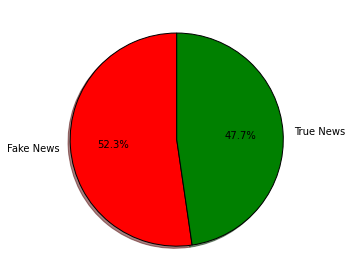

In [173]:
# Visualize the Label Class
speech = [23489, 21417]
label = ["Fake News", "True News"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

![Big Data Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![Big Data](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Text Cleaning </font>
> <b> Handle Missing Value <br> <b>Lowercase <br> Remove Punctuation <br> Remove Urls <br> Removing @tags <br> Remove Special Characters </b>

#### <font color = blue>2.1.1: Handle the Missing Value

In [174]:
df = df[["text", "label"]]
df.toPandas().isnull().sum()

text     8
label    0
dtype: int64

In [175]:
df = df.dropna()

#### <font color = blue>2.1.2: Lower Case

In [176]:
from pyspark.sql.functions import lower, col

In [177]:
df = df.select("*", lower(col('text')))

#### <font color = blue>2.1.3: Remove Punctuation

In [186]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['text'] = df['text'].apply(remove_punct)

#### <font color = blue>2.1.4: Remove URLs

In [21]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['text'] = df['text'].apply(remove_URL)

#### <font color = blue>2.1.5: Removing @tags

In [22]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['text'] = df['text'].apply(remove_tag)

#### <font color = blue>2.1.6: Remove Special Characters

In [23]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['text'] = df['text'].apply(remove_special)

![Big Data Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46>  Preprocessing Operations </font>
> <b>Tokenizing <br> Removing Stop Words <br> WordCloud <br>

#### <font color = blue>2.2.1: Tokenizing

In [189]:
from pyspark.ml.feature import Tokenizer

In [191]:
tokenizer = Tokenizer(inputCol = 'lower(text)', outputCol = 'Tokenization')

#### <font color = blue>2.2.2: Removing StopWords

In [194]:
from pyspark.ml.feature import StopWordsRemover

In [195]:
stopwords_remover = StopWordsRemover(inputCol = 'Tokenization', outputCol = "StopWords")

#### <font color = blue>2.2.3: WordCloud

In [30]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

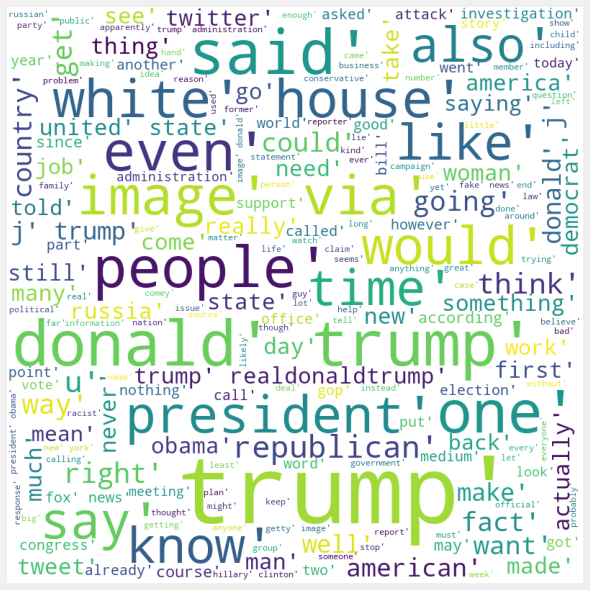

In [31]:
# WordCloud of fake News
fake_news = df[df['label'] == 1]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in fake_news.text:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

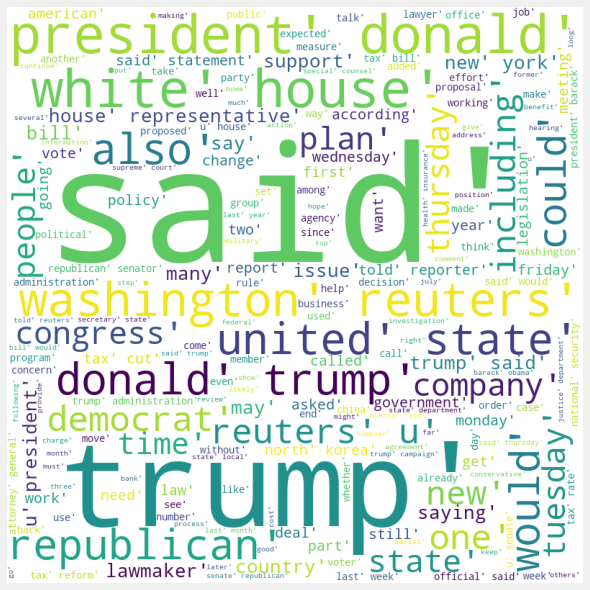

In [32]:
# WordCloud of Positive News
true_news = df[df['label'] == 0]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in true_news.text:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

![Big Data](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46>  Feature Extraction </font>
> <b>CountVectorizer <br> IDF <br>

<font color = blue><b>2.3.1: CountVectorizer </b> <br> 

In [33]:
from pyspark.ml.feature import CountVectorizer

In [34]:
vectorizer = CountVectorizer(inputCol = "StopWords", outputCol = "ContVect")

<font color = blue><b>2.3.2: TF-IDF Model </b> <br> 

In [200]:
from pyspark.ml.feature import IDF

In [201]:
idf = IDF(inputCol = "ContVect", outputCol = "FeatureExtraction")

![Big Data](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46>  Split the Dataset </font>

#### <font color = blue>2.4.1: Split the dataset into Train and Test

In [202]:
(trainDF,testDF) = df.randomSplit((0.8, 0.2), seed = 42)

#### <font color = blue>2.4.2: Training Data

In [205]:
print("Test Data", trainDF.count())

X_train 36079


#### <font color = blue>2.4.3: Testing Data

In [206]:
print("Training Data", testDF.count())

Training Data 8819


![Big Data Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### © Mythbusters